# Stock Market Forecasting Using LSTM

In [1]:
import yfinance as yf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

C:\Users\TEJAS\AppData\Roaming\Python\Python311\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
df = yf.download("GOOG", period="5y", interval="1d")

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-21,55.542000,55.597000,54.625999,54.848499,54.848499,28302000
2019-02-22,55.044998,55.562000,54.779999,55.518501,55.518501,20990000
2019-02-25,55.799999,55.926998,55.363499,55.470001,55.470001,28262000
2019-02-26,55.287498,55.975498,54.995998,55.756500,55.756500,29426000
2019-02-27,55.347500,55.898998,55.049999,55.802502,55.802502,19368000


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-13,146.070007,148.039993,145.110001,146.369995,146.369995,18138500
2024-02-14,147.369995,147.830002,145.554993,147.139999,147.139999,16651800
2024-02-15,144.460007,144.759995,141.880005,143.940002,143.940002,26724300
2024-02-16,144.210007,144.479996,141.520004,141.759995,141.759995,21849700
2024-02-20,140.940002,143.328995,140.800003,142.199997,142.199997,18607100


In [6]:
df1=df.reset_index()['Close']

In [7]:
df1

0        54.848499
1        55.518501
2        55.470001
3        55.756500
4        55.802502
           ...    
1253    146.369995
1254    147.139999
1255    143.940002
1256    141.759995
1257    142.199997
Name: Close, Length: 1258, dtype: float64

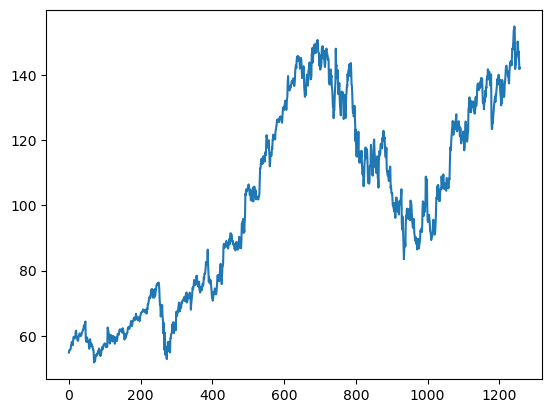

In [8]:
plt.plot(df1)

In [9]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [10]:
df1

0        54.848499
1        55.518501
2        55.470001
3        55.756500
4        55.802502
           ...    
1253    146.369995
1254    147.139999
1255    143.940002
1256    141.759995
1257    142.199997
Name: Close, Length: 1258, dtype: float64

In [11]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.02947727]
 [0.03598034]
 [0.0355096 ]
 ...
 [0.89420409]
 [0.87304481]
 [0.8773155 ]]


In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(817, 441)

In [15]:
train_data

array([[0.02947727],
       [0.03598034],
       [0.0355096 ],
       [0.03829037],
       [0.03873687],
       [0.04061496],
       [0.05084029],
       [0.0541452 ],
       [0.06105108],
       [0.05902737],
       [0.05196136],
       [0.05148576],
       [0.06771425],
       [0.07617795],
       [0.07623619],
       [0.07246538],
       [0.0719364 ],
       [0.07183936],
       [0.07891992],
       [0.09111073],
       [0.09478445],
       [0.08214719],
       [0.0760809 ],
       [0.07201404],
       [0.06638455],
       [0.06418612],
       [0.06652529],
       [0.07677487],
       [0.07971582],
       [0.08235101],
       [0.08675755],
       [0.0829479 ],
       [0.08134158],
       [0.07814342],
       [0.08052628],
       [0.08172009],
       [0.08815038],
       [0.08971789],
       [0.09264425],
       [0.09711392],
       [0.09712847],
       [0.1031802 ],
       [0.1108043 ],
       [0.10665495],
       [0.11027046],
       [0.11450716],
       [0.12198079],
       [0.073

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
# Create LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

12/12 [==============================] - 10s 289ms/step - loss: 0.0838 - val_loss: 0.0185
Epoch 2/100
12/12 [==============================] - 2s 140ms/step - loss: 0.0126 - val_loss: 0.0089
Epoch 3/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0050 - val_loss: 0.0054
Epoch 4/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0027 - val_loss: 0.0035
Epoch 5/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0023 - val_loss: 0.0038
Epoch 6/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0025 - val_loss: 0.0030
Epoch 7/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0021 - val_loss: 0.0030
Epoch 8/100
12/12 [==============================] - 2s 137ms/step - loss: 0.0021 - val_loss: 0.0030
Epoch 9/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 10/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0020 - val_

In [26]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 32ms/step


In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

104.0361366281143

In [29]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

121.30214510726908

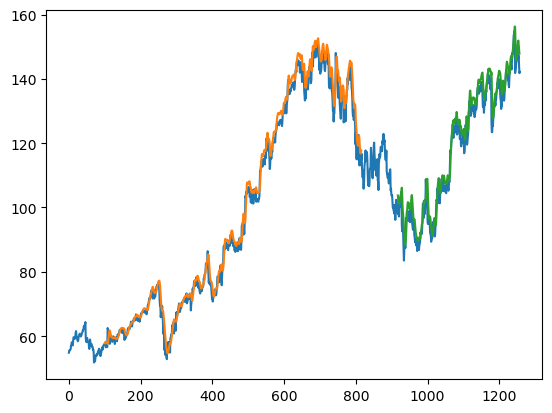

In [30]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [31]:
len(test_data)

441

In [32]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [33]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [34]:
temp_input

[0.7730725907907872,
 0.7892816808698304,
 0.7768579453828679,
 0.8090819630201114,
 0.7909316920404696,
 0.819758680127318,
 0.817040997245958,
 0.8436354865996389,
 0.8511091885746835,
 0.848197343172481,
 0.8724624746864873,
 0.8587769049679614,
 0.8421796379498423,
 0.8607182339711694,
 0.8655712602739707,
 0.8489738451532423,
 0.8460619997510395,
 0.8243205367001598,
 0.8355794451646756,
 0.857126893797322,
 0.7265805158724898,
 0.6952300074251243,
 0.6948417564347438,
 0.7176509652476488,
 0.7132832711956494,
 0.7353159780277931,
 0.745119111893817,
 0.7624928808926974,
 0.7729754354790612,
 0.7821961558338617,
 0.7905433669987842,
 0.7753049414213453,
 0.7983082387037883,
 0.7942317143817483,
 0.8116054833806288,
 0.8208263518380385,
 0.8433443168696797,
 0.8262617176007585,
 0.8357736076855184,
 0.8425678148889182,
 0.8561563773983274,
 0.838685453087721,
 0.8370354419170818,
 0.8425678148889182,
 0.8210203662562718,
 0.7969493972631083,
 0.7911258545613125,
 0.7650165493558241

In [35]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9002696]
101
1 day input [0.78928168 0.77685795 0.80908196 0.79093169 0.81975868 0.817041
 0.84363549 0.85110919 0.84819734 0.87246247 0.8587769  0.84217964
 0.86071823 0.86557126 0.84897385 0.846062   0.82432054 0.83557945
 0.85712689 0.72658052 0.69523001 0.69484176 0.71765097 0.71328327
 0.73531598 0.74511911 0.76249288 0.77297544 0.78219616 0.79054337
 0.77530494 0.79830824 0.79423171 0.81160548 0.82082635 0.84334432
 0.82626172 0.83577361 0.84256781 0.85615638 0.83868545 0.83703544
 0.84256781 0.82102037 0.7969494  0.79112585 0.76501655 0.78209915
 0.77278127 0.8409178  0.82334987 0.80452011 0.79423171 0.79743473
 0.78996103 0.7961729  0.82868823 0.83752077 0.85266219 0.87343314
 0.88236269 0.88333335 0.86993895 0.86838595 0.86498877 0.85169153
 0.8594564  0.83693829 0.83062941 0.86110641 0.88080969 0.89284524
 0.89158341 0.89711593 0.89556293 0.8840127  0.90439547 0.93331947
 0.93079595 0.94021068 0.95641992 0.98835277 0.98980862 1.
 0.98262623 0.87343314 0.88226568 0.89032158

9 day output [[1.01379]]
10 day input [0.87246247 0.8587769  0.84217964 0.86071823 0.86557126 0.84897385
 0.846062   0.82432054 0.83557945 0.85712689 0.72658052 0.69523001
 0.69484176 0.71765097 0.71328327 0.73531598 0.74511911 0.76249288
 0.77297544 0.78219616 0.79054337 0.77530494 0.79830824 0.79423171
 0.81160548 0.82082635 0.84334432 0.82626172 0.83577361 0.84256781
 0.85615638 0.83868545 0.83703544 0.84256781 0.82102037 0.7969494
 0.79112585 0.76501655 0.78209915 0.77278127 0.8409178  0.82334987
 0.80452011 0.79423171 0.79743473 0.78996103 0.7961729  0.82868823
 0.83752077 0.85266219 0.87343314 0.88236269 0.88333335 0.86993895
 0.86838595 0.86498877 0.85169153 0.8594564  0.83693829 0.83062941
 0.86110641 0.88080969 0.89284524 0.89158341 0.89711593 0.89556293
 0.8840127  0.90439547 0.93331947 0.93079595 0.94021068 0.95641992
 0.98835277 0.98980862 1.         0.98262623 0.87343314 0.88226568
 0.89032158 0.90381298 0.908472   0.92079858 0.92603993 0.95515808
 0.94069601 0.91778972 0.

18 day output [[1.1050774]]
19 day input [0.85712689 0.72658052 0.69523001 0.69484176 0.71765097 0.71328327
 0.73531598 0.74511911 0.76249288 0.77297544 0.78219616 0.79054337
 0.77530494 0.79830824 0.79423171 0.81160548 0.82082635 0.84334432
 0.82626172 0.83577361 0.84256781 0.85615638 0.83868545 0.83703544
 0.84256781 0.82102037 0.7969494  0.79112585 0.76501655 0.78209915
 0.77278127 0.8409178  0.82334987 0.80452011 0.79423171 0.79743473
 0.78996103 0.7961729  0.82868823 0.83752077 0.85266219 0.87343314
 0.88236269 0.88333335 0.86993895 0.86838595 0.86498877 0.85169153
 0.8594564  0.83693829 0.83062941 0.86110641 0.88080969 0.89284524
 0.89158341 0.89711593 0.89556293 0.8840127  0.90439547 0.93331947
 0.93079595 0.94021068 0.95641992 0.98835277 0.98980862 1.
 0.98262623 0.87343314 0.88226568 0.89032158 0.90381298 0.908472
 0.92079858 0.92603993 0.95515808 0.94069601 0.91778972 0.92526342
 0.89420409 0.87304481 0.8773155  0.90026963 0.90746659 0.92018032
 0.93479943 0.949911   0.964658

27 day output [[1.1599259]]
28 day input [0.77297544 0.78219616 0.79054337 0.77530494 0.79830824 0.79423171
 0.81160548 0.82082635 0.84334432 0.82626172 0.83577361 0.84256781
 0.85615638 0.83868545 0.83703544 0.84256781 0.82102037 0.7969494
 0.79112585 0.76501655 0.78209915 0.77278127 0.8409178  0.82334987
 0.80452011 0.79423171 0.79743473 0.78996103 0.7961729  0.82868823
 0.83752077 0.85266219 0.87343314 0.88236269 0.88333335 0.86993895
 0.86838595 0.86498877 0.85169153 0.8594564  0.83693829 0.83062941
 0.86110641 0.88080969 0.89284524 0.89158341 0.89711593 0.89556293
 0.8840127  0.90439547 0.93331947 0.93079595 0.94021068 0.95641992
 0.98835277 0.98980862 1.         0.98262623 0.87343314 0.88226568
 0.89032158 0.90381298 0.908472   0.92079858 0.92603993 0.95515808
 0.94069601 0.91778972 0.92526342 0.89420409 0.87304481 0.8773155
 0.90026963 0.90746659 0.92018032 0.93479943 0.949911   0.96465886
 0.9785248  0.99128705 1.00297391 1.01379001 1.02403092 1.03400338
 1.04395807 1.05405021 

In [36]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [37]:
len(df1)

1258

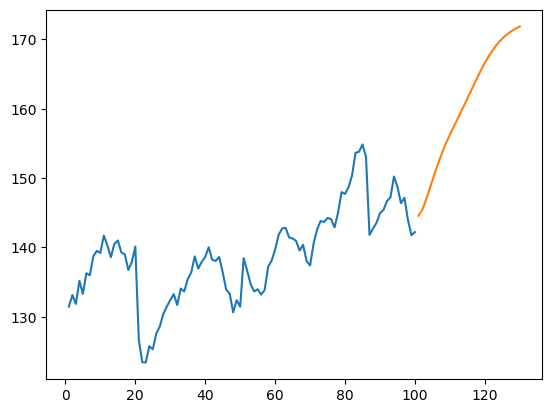

In [38]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

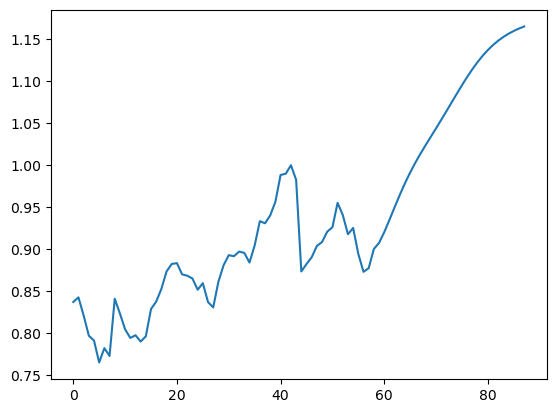

In [39]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [40]:
df3=scaler.inverse_transform(df3).tolist()

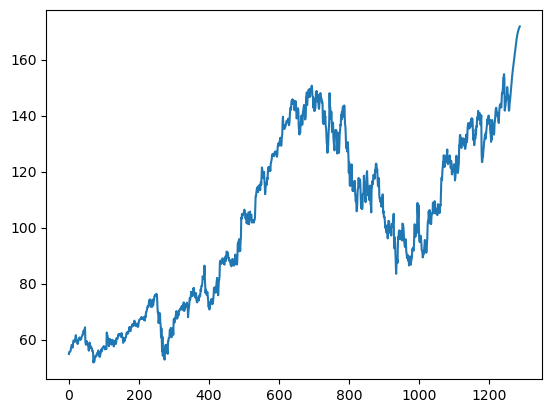

In [41]:
plt.plot(df3)